### data can be downloaded from https://grouplens.org/datasets/movielens/100k/

In [1]:
import pandas as pd     
import numpy as np  
import seaborn as sns 
import matplotlib.pyplot as plt 

In [2]:
data=pd.read_csv('u.data', sep='\t', names=['user_id', 'item_id', 'rating', 'timestamp'])
data.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [11]:
data.describe()

,user_id,item_id,rating,timestamp
count,100000.00000,100000.000000,100000.000000,1.000000e+05
mean,462.48475,425.530130,3.529860,8.835289e+08
std,266.61442,330.798356,1.125674,5.343856e+06
min,1.00000,1.000000,1.000000,8.747247e+08
25%,254.00000,175.000000,3.000000,8.794487e+08
50%,447.00000,322.000000,4.000000,8.828269e+08
75%,682.00000,631.000000,4.000000,8.882600e+08
max,943.00000,1682.000000,5.000000,8.932866e+08


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user_id    100000 non-null  int64
 1   item_id    100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


In [4]:
movie=pd.read_csv('u.item', sep='\|', header=None)

In [5]:
movie.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [7]:
movie.shape

(1682, 24)

In [6]:
movie_=movie.iloc[:, 0:2]
movie_.columns=['movie_id', 'movie_name']
movie_

,movie_id,movie_name
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)
...,...,...
1677,1678,Mat' i syn (1997)
1678,1679,B. Monkey (1998)
1679,1680,Sliding Doors (1998)
1680,1681,You So Crazy (1994)


In [7]:
# merge data with the movie_ table 
df=data.merge(movie_, how='left', left_on='item_id', right_on='movie_id')
df

,user_id,item_id,rating,timestamp,movie_id,movie_name
0,196,242,3,881250949,242,Kolya (1996)
1,186,302,3,891717742,302,L.A. Confidential (1997)
2,22,377,1,878887116,377,Heavyweights (1994)
3,244,51,2,880606923,51,Legends of the Fall (1994)
4,166,346,1,886397596,346,Jackie Brown (1997)
...,...,...,...,...,...,...
99995,880,476,3,880175444,476,"First Wives Club, The (1996)"
99996,716,204,5,879795543,204,Back to the Future (1985)
99997,276,1090,1,874795795,1090,Sliver (1993)
99998,13,225,2,882399156,225,101 Dalmatians (1996)


In [8]:
df=df.drop(columns=['timestamp', 'movie_id'], axis=1)
df

,user_id,item_id,rating,movie_name
0,196,242,3,Kolya (1996)
1,186,302,3,L.A. Confidential (1997)
2,22,377,1,Heavyweights (1994)
3,244,51,2,Legends of the Fall (1994)
4,166,346,1,Jackie Brown (1997)
...,...,...,...,...
99995,880,476,3,"First Wives Club, The (1996)"
99996,716,204,5,Back to the Future (1985)
99997,276,1090,1,Sliver (1993)
99998,13,225,2,101 Dalmatians (1996)


In [9]:
df=df[['user_id', 'movie_name', 'rating']]
df.to_csv('user_movie_rating.csv')

In [10]:
# pick the top rated movies based on average rating
rating_sorted=df.groupby('movie_name')['rating'].mean().sort_values(ascending=False)
rating_sorted.head(20)


movie_name
Marlene Dietrich: Shadow and Light (1996)                 5.000000
Prefontaine (1997)                                        5.000000
Santa with Muscles (1996)                                 5.000000
Star Kid (1997)                                           5.000000
Someone Else's America (1995)                             5.000000
Entertaining Angels: The Dorothy Day Story (1996)         5.000000
Saint of Fort Washington, The (1993)                      5.000000
Great Day in Harlem, A (1994)                             5.000000
They Made Me a Criminal (1939)                            5.000000
Aiqing wansui (1994)                                      5.000000
Pather Panchali (1955)                                    4.625000
Anna (1996)                                               4.500000
Everest (1998)                                            4.500000
Maya Lin: A Strong Clear Vision (1994)                    4.500000
Some Mother's Son (1996)                           

In [11]:
# create a dataframe to include the count of rating and the average rating
rating_count=pd.DataFrame(df.groupby('movie_name')['rating'].mean())
rating_count

,rating
movie_name,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390
...,...
Young Guns II (1990),2.772727
"Young Poisoner's Handbook, The (1995)",3.341463
Zeus and Roxanne (1997),2.166667


In [12]:
rating_count['rating_numbers']=df.groupby('movie_name')['rating'].count()

In [19]:
rating_count

,rating,rating_numbers
movie_name,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41
...,...,...
Young Guns II (1990),2.772727,44
"Young Poisoner's Handbook, The (1995)",3.341463,41
Zeus and Roxanne (1997),2.166667,6


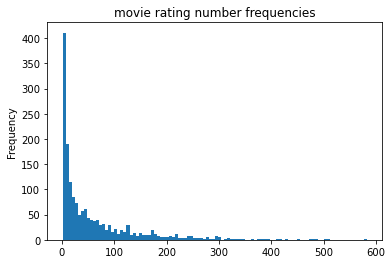

In [21]:
rating_count['rating_numbers'].plot(bins=100, kind='hist')
plt.title('movie rating number frequencies')
plt.show()

In [22]:
# most rated movies 
rating_count.sort_values('rating_numbers', ascending=False).head(50)  #top 40 most rated movies

,rating,rating_numbers
movie_name,,
Star Wars (1977),4.358491,583
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


## modeling 1 - item_based collaborative filtering based on Pearson correlations. 

In [13]:
# Creating the matrix of the 'user_id' as index and "movie_name" as columns
df_matrix=df.pivot_table(index='user_id', columns='movie_name', values='rating')

In [14]:
df_matrix

movie_name,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
# find the single movie ratings - "2001: A Space Odyssey (1968)"
df_matrix['2001: A Space Odyssey (1968)']


user_id
1      4.0
2      NaN
3      NaN
4      NaN
5      4.0
      ... 
939    NaN
940    NaN
941    NaN
942    3.0
943    NaN
Name: 2001: A Space Odyssey (1968), Length: 943, dtype: float64

In [15]:
Odyssey_Corr=pd.DataFrame(df_matrix.corrwith(df_matrix["2001: A Space Odyssey (1968)"]), columns=['corr'])
Odyssey_Corr.sort_values('corr', ascending=False).head()


,corr
movie_name,
Faithful (1996),1.0
"Good Man in Africa, A (1994)",1.0
Dream With the Fishes (1997),1.0
Switchback (1997),1.0
2001: A Space Odyssey (1968),1.0


In [16]:
# add numbers of rating into single movie dataframe
odyssey=Odyssey_Corr.join(rating_count['rating_numbers'])
odyssey.sort_values('rating_numbers', ascending=False)

,corr,rating_numbers
movie_name,,
Star Wars (1977),0.230884,583
Contact (1997),0.014245,509
Fargo (1996),0.299882,508
Return of the Jedi (1983),0.085975,507
Liar Liar (1997),-0.057864,485
...,...,...
"Great Day in Harlem, A (1994)",NaN,1
"Other Voices, Other Rooms (1997)",NaN,1
Good Morning (1971),NaN,1


In [17]:
odyssey.dropna(inplace=True)

In [18]:
odyssey.sort_values('corr', ascending=False).reset_index() 

,movie_name,corr,rating_numbers
0,Faithful (1996),1.0,10
1,"Good Man in Africa, A (1994)",1.0,2
2,Dream With the Fishes (1997),1.0,7
3,Switchback (1997),1.0,17
4,2001: A Space Odyssey (1968),1.0,259
...,...,...,...
1307,Schizopolis (1996),-1.0,4
1308,Grosse Fatigue (1994),-1.0,4
1309,Love and Death on Long Island (1997),-1.0,2
1310,"Hunted, The (1995)",-1.0,3


In [19]:
# notice rating_numbers have a big range. Filter the movies with more than 50 ratings, generate top 20 higly-correlated movies 
odyssey[odyssey.rating_numbers>50].sort_values('corr', ascending=False).head(20) 

,corr,rating_numbers
movie_name,,
2001: A Space Odyssey (1968),1.000000,259
Forget Paris (1995),0.464244,62
True Romance (1993),0.459189,104
Natural Born Killers (1994),0.442248,128
Angels and Insects (1995),0.434915,72
Things to Do in Denver when You're Dead (1995),0.433234,71
Being There (1979),0.425009,116
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1963),0.392916,194
"Clockwork Orange, A (1971)",0.388071,221


In [20]:
## create the item_based collabarative filter for whole dataset
movie_corr=df_matrix.corr(method='pearson', min_periods=50)
movie_corr

movie_name,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
movie_name,,,,,,,,,,,,,,,,,,,,,
'Til There Was You (1997),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1-900 (1994),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101 Dalmatians (1996),NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12 Angry Men (1957),NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.178848,NaN,NaN,...,NaN,NaN,NaN,0.096546,NaN,NaN,NaN,NaN,NaN,NaN
187 (1997),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Young Guns II (1990),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Young Poisoner's Handbook, The (1995)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zeus and Roxanne (1997),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
# generate the recommender movie function
def recommended_movies(movie):
    movie_rating=df_matrix[movie]
    similiar_movies=df_matrix.corrwith(movie_rating)
    similiar_movies_corr=pd.DataFrame(similiar_movies, columns=['correlations']).dropna()
    similiar_movies_corr=similiar_movies_corr.join(rating_count['rating_numbers'])
    return similiar_movies_corr[similiar_movies_corr['rating_numbers']>50].sort_values('correlations', ascending=False).head(10)
    
    

In [54]:
# generate the recommended_movies using function
recommended_movies('2001: A Space Odyssey (1968)')

,correlations,rating_numbers
movie_name,,
2001: A Space Odyssey (1968),1.000000,259
Forget Paris (1995),0.464244,62
True Romance (1993),0.459189,104
Natural Born Killers (1994),0.442248,128
Angels and Insects (1995),0.434915,72
Things to Do in Denver when You're Dead (1995),0.433234,71
Being There (1979),0.425009,116
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1963),0.392916,194
"Clockwork Orange, A (1971)",0.388071,221


## model 2 Collabarative Filtering Recommender based on surprise package 


In [22]:
import surprise
import pandas as pd
from surprise import Reader
from surprise import Dataset
from surprise.model_selection import cross_validate, GridSearchCV
from surprise import NormalPredictor
from surprise import KNNBasic
from surprise import KNNWithMeans
from surprise import KNNWithZScore
from surprise import KNNBaseline
from surprise import SVD  
from surprise import BaselineOnly
from surprise import SVDpp
from surprise import NMF
from surprise import SlopeOne
from surprise import CoClustering
from surprise.accuracy import rmse
from surprise import accuracy
from surprise.model_selection import train_test_split

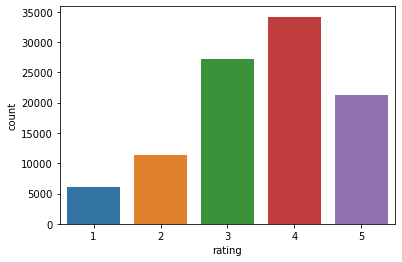

In [74]:
sns.countplot(df['rating'])

In [23]:
reader=Reader(rating_scale=(1,5))
data=Dataset.load_from_df(df[['user_id', 'movie_name', 'rating']], reader)

In [24]:
# Suprise has algorithms including KNNBasic,  KNNWithMeans, KNNWithZScore, KNNBaseline,SVD, SVDpp,NMF, SlopeOne, Coclustering
# Iterate through the following algorithms for modeling
benchmark = []
# Iterate over all algorithms
for algorithm in [SVD(), NMF(), NormalPredictor(), KNNBasic()]:

# Perform cross validation
    results = cross_validate(algorithm, data, measures=['RMSE'], cv=3, verbose=False)
# Get results & append algorithm name
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]],index=['Algorithm']))
    benchmark.append(tmp)



Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.


In [25]:
models=pd.DataFrame(benchmark).set_index('Algorithm').sort_values('test_rmse')


In [26]:
models  #best model is SVD with lowest "test_rmse"

,test_rmse,fit_time,test_time
Algorithm,,,
SVD,0.944422,3.765954,0.212730
NMF,0.974590,4.182841,0.173130
KNNBasic,0.987371,0.242305,5.033707
NormalPredictor,1.522212,0.120685,0.273840


In [27]:
# Using GridSeachCV to find the best parameters
param_grid = {'n_epochs': [5, 10], 'lr_all': [0.002, 0.005],
              'reg_all': [0.4, 0.6]}
gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=3)

gs.fit(data)

# best RMSE score
print(gs.best_score['rmse'])

# combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

0.9636793494440657
{'n_epochs': 10, 'lr_all': 0.005, 'reg_all': 0.4}


In [28]:
# use the best algorithms generated
algo = gs.best_estimator['rmse']
algo.fit(data.build_full_trainset())

In [34]:
# code is from the Suprise documents
from collections import defaultdict

from surprise import SVD
from surprise import Dataset


def get_top_n(predictions, n=10):
    """Return the top-N recommendation for each user from a set of predictions.

    Args:
        predictions(list of Prediction objects): The list of predictions, as
            returned by the test method of an algorithm.
        n(int): The number of recommendation to output for each user. Default
            is 10.

    Returns:
    A dict where keys are user (raw) ids and values are lists of tuples:
        [(raw item id, rating estimation), ...] of size n.
    """

    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n


In [31]:
# train an SVD algorithm on the whole dataset
trainset=data.build_full_trainset()
algo.fit(trainset)

In [32]:
# predict rating for all pairs (u, i) that are not in the training set
testset=trainset.build_anti_testset()
predictions=algo.test(testset)

In [39]:
top_10=get_top_n(predictions, n=10)
# Print the recommended items for each user
for uid, user_ratings in top_10.items():
    print(uid, [iid for (iid, _) in user_ratings])

196 ['Close Shave, A (1995)', 'Wrong Trousers, The (1993)', "Schindler's List (1993)", 'Shawshank Redemption, The (1994)', 'Casablanca (1942)', 'Wallace & Gromit: The Best of Aardman Animation (1996)', 'Usual Suspects, The (1995)', 'Rear Window (1954)', '12 Angry Men (1957)', 'Star Wars (1977)']
186 ['Close Shave, A (1995)', 'Wrong Trousers, The (1993)', "Schindler's List (1993)", 'Shawshank Redemption, The (1994)', 'Casablanca (1942)', 'Wallace & Gromit: The Best of Aardman Animation (1996)', 'Rear Window (1954)', '12 Angry Men (1957)', 'Star Wars (1977)', 'Third Man, The (1949)']
22 ['Close Shave, A (1995)', 'Wrong Trousers, The (1993)', "Schindler's List (1993)", 'Shawshank Redemption, The (1994)', 'Casablanca (1942)', 'Wallace & Gromit: The Best of Aardman Animation (1996)', 'Usual Suspects, The (1995)', 'Rear Window (1954)', '12 Angry Men (1957)', 'Third Man, The (1949)']
244 ['Close Shave, A (1995)', 'Casablanca (1942)', 'Usual Suspects, The (1995)', 'Rear Window (1954)', '12 Ang